# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score





In [ ]:
# Read the given CSV file, and view some sample records

advertising = pd.read_csv('/content/Simple linear regression (2).csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Let's inspect the various aspects of our dataframe

In [ ]:
#Shape of DataSet
advertising.shape


(200, 4)

In [ ]:
#get info ()
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
#Describe dataset
advertising.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Sales`.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

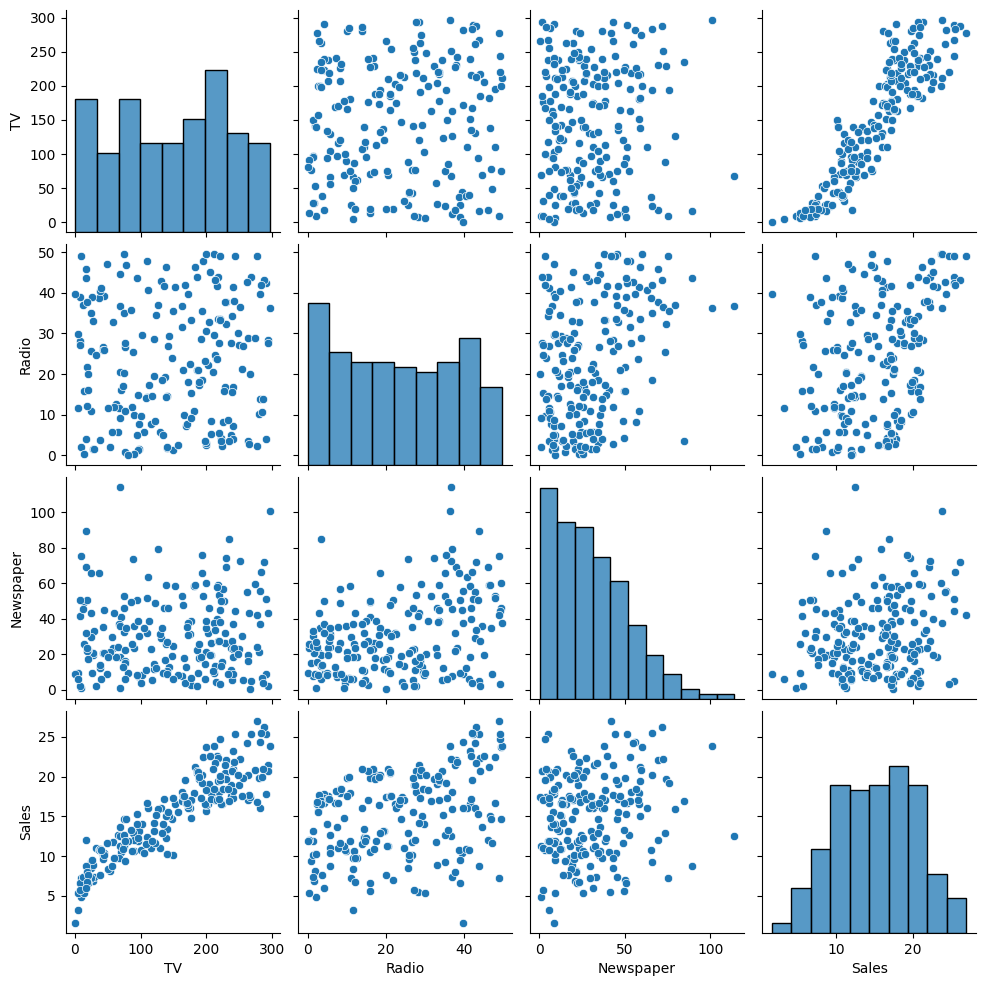

In [ ]:
#Create pairplot using seaborn library
sns.pairplot(advertising)
plt.show()

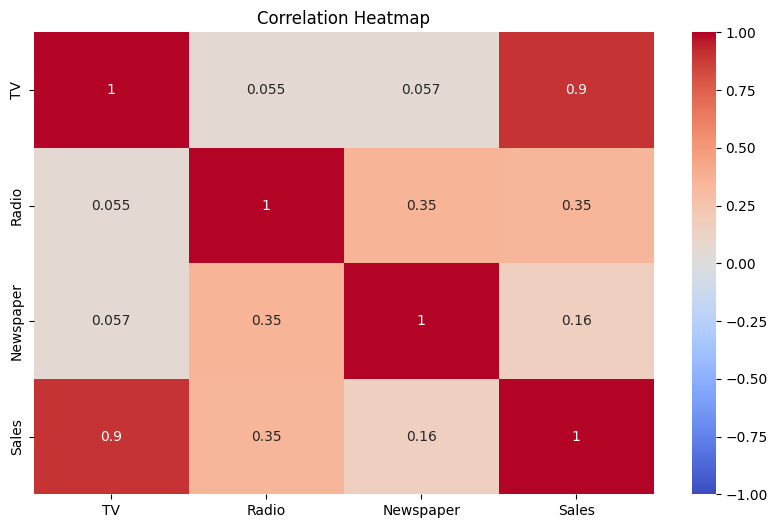

In [ ]:
plt.figure(figsize=(10, 6))
corr_matrix = advertising.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

X = advertising['TV']
y = advertising['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [ ]:
#from sklearn.model_selection import train_test_split


from sklearn.model_selection import train_test_split

In [ ]:
# Let's now take a look at the train dataset
X = advertising['TV']
y = advertising['Sales']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape




((160,), (40,), (160,), (40,))

In [ ]:
X_train.head(), y_train.head()


(79     116.0
 197    177.0
 38      43.1
 24      62.3
 122    224.0
 Name: TV, dtype: float64,
 79     11.0
 197    14.8
 38     10.1
 24      9.7
 122    16.6
 Name: Sales, dtype: float64)

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [ ]:
#import statsmodels.api as sm
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the resgression line using 'OLS'
model = sm.OLS(y_train, X_train_sm).fit()

# Display the model summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.1
Date:                Sat, 25 May 2024   Prob (F-statistic):           1.71e-59
Time:                        02:30:20   Log-Likelihood:                -355.76
No. Observations:                 160   AIC:                             715.5
Df Residuals:                     158   BIC:                             721.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0071      0.364     19.274      0.000       6.289       7.725
TV             0.0555      0.002     26.251      0.000       0.051       0.060
==============================================================================
Omnibus:                        0.631   Durbin-Watson:                   2.262
Prob(Omnibus):                  0.730   Jarque-Bera (JB):                0.767
Skew:                          -0.110   Prob(JB):                        0.681
Kurtosis:                       2.742   Cond. No.                         352.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
# Print the parameters
print("Intercept (statsmodels):", model.params[0])
print("Slope (statsmodels):", model.params[1])


Intercept (statsmodels): 7.007108428241844
Slope (statsmodels): 0.05548294393146319


In [ ]:
# Performing a summary operation lists out all the different parameters of the regression line fitted


####  Looking at some key statistics from the summary

The values we are concerned with are -
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

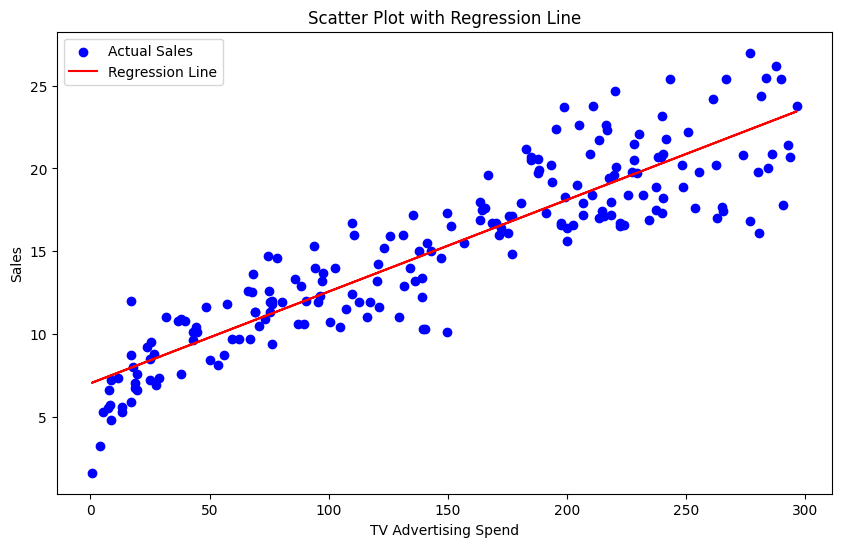

In [ ]:
#Plot a scatter to view the sales parameter
# Plot a scatter plot to visualize the relationship between TV advertising spend and Sales
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Sales')

# Plot the regression line
plt.plot(X, model.predict(sm.add_constant(X)), color='red', label='Regression Line')

plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.show()

## Step 4: Residual analysis
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

#Residual Analysis
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

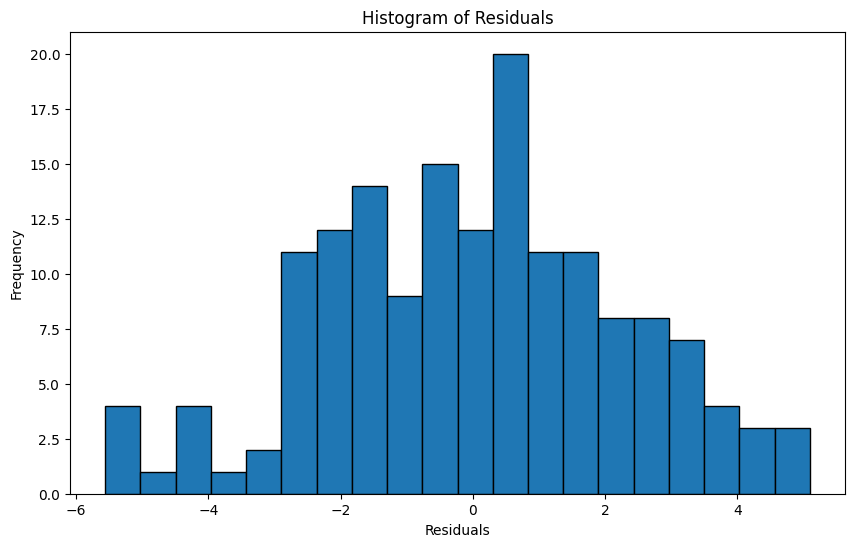

In [ ]:
#Make a histrogram for error terms
# Calculate the residuals (error terms)
residuals = y_train - model.predict(X_train_sm)

# Plot a histogram of the residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

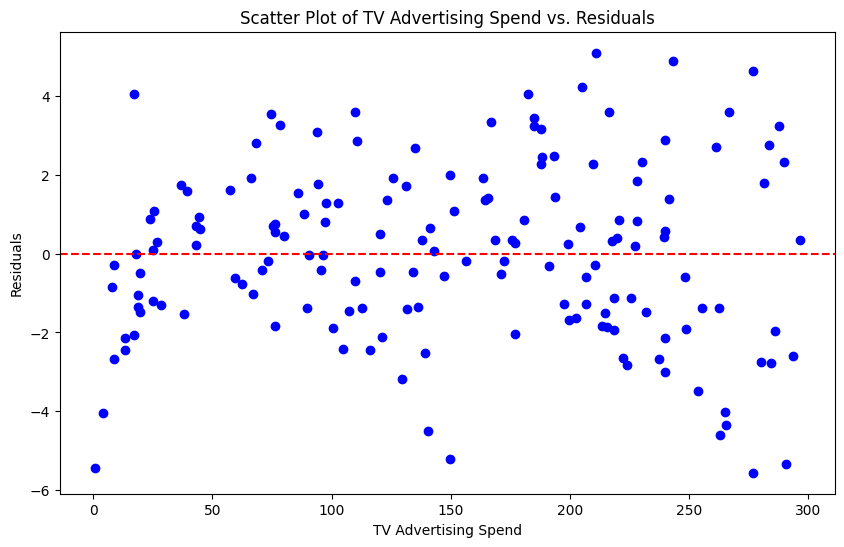

In [ ]:
# Create a scatterplot for x_train and computed residual
# Create a scatter plot of X_train vs. residuals
plt.figure(figsize=(10, 6))
plt.scatter(X_train, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Residuals')
plt.title('Scatter Plot of TV Advertising Spend vs. Residuals')
plt.show()


We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = model.predict(X_test_sm)
print(y_pred)

95     16.067473
15     17.848476
30     23.258063
158     7.656259
128    19.230001
115    11.173878
69     19.035811
170     9.781256
174    19.346515
45     16.722172
66      8.754821
182    10.125250
165    20.017859
78      7.306716
186    14.746979
177    16.450305
56      7.412134
152    17.970538
82     11.184974
68     20.178759
124    19.740444
16     10.768852
148     9.115460
93     20.927779
65     10.835432
60      9.975446
84     18.852717
67     14.735883
125    11.845221
132     7.473165
9      18.092601
18     10.846528
55     18.042666
75      7.944770
150    22.581171
104    20.223146
135     9.686935
137    22.192790
164    13.509709
76      8.532889
dtype: float64


In [ ]:
# Check the first 5 rows
print(y_pred.head())

95     16.067473
15     17.848476
30     23.258063
158     7.656259
128    19.230001
dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [ ]:
#Returns the mean squared error; we'll take a square root
mse = mean_squared_error(y_test, y_pred)
# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Print the RMSE
print('Root Mean Squared Error:', rmse)


# create the formul or import the function from the numpy library to calculate the RMSE
# Calculate RMSE using numpy
rmse_numpy = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the numpy calculated RMSE
print('Numpy Calculated Root Mean Squared Error:', rmse_numpy)

Root Mean Squared Error: 2.470035001123256
Numpy Calculated Root Mean Squared Error: 2.470035001123256


###### Checking the R-squared on the test set

In [ ]:
# Print the RMSE
print('Root Mean Squared Error:', rmse)

# Calculate the R-squared on the test set
r_squared = r2_score(y_test, y_pred)

# Print the R-squared value
print('R-squared on the Test Set:', r_squared)

Root Mean Squared Error: 2.470035001123256
R-squared on the Test Set: 0.802561303423698


##### Visualizing the fit on the test set

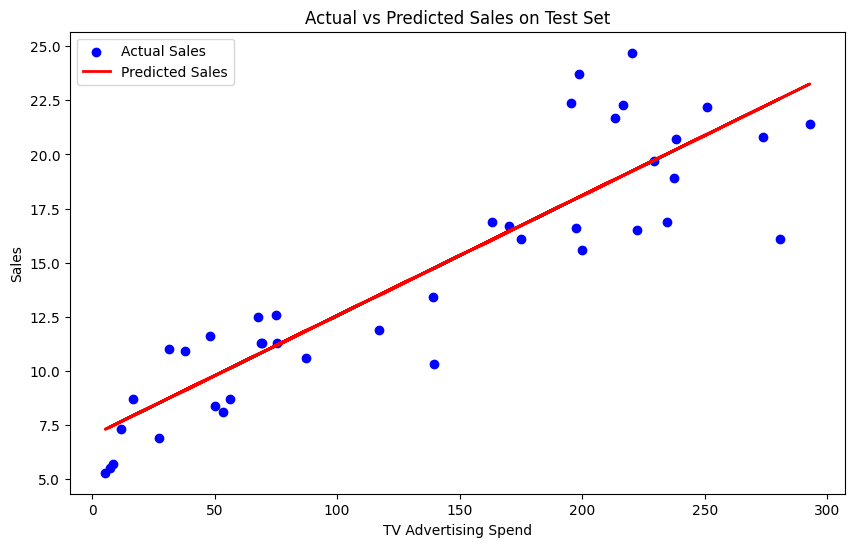

In [ ]:
#Visualizing the fit on the test set using line trend line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Sales')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales on Test Set')
plt.legend()
plt.show()

### Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [ ]:
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Get Shape()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160,) (40,) (160,) (40,)


In [ ]:
import numpy as np

# Reshaping training and testing features
# Reshaping training and testing features
X = advertising['TV'].values.reshape(-1, 1)  # Reshape to be a 2D array
y = advertising['Sales'].values.reshape(-1, 1)  # Reshape to be a 2D array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape y_train and y_test to be 1D arrays
y_train = y_train.ravel()
y_test = y_test.ravel()

# Display the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(160, 1) (40, 1) (160,) (40,)


In [ ]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Printing the intercept and coefficients of the linear model
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)


Intercept: 7.007108428241848
Coefficient: [0.05548294]


The equationwe get is the same as what we got before!

$ Sales = 6.948 + 0.054* TV $

Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search etc.)

The sklearn linear model is useful because it is compatible with a wide range of sklearn utilities such as cross-validation, grid search, and other model selection and evaluation tools. This compatibility allows for more efficient model tuning, validation, and performance optimization, making it a valuable tool for machine learning practitioners.

---
## Addressing some common questions/doubts on Simple Linear Regression
---

### Q: Why is it called 'R-squared'?

Based on what we learnt so far, do you see it? Can you answer this?







.

.

.

.

  #### Drumroll...
  
.

.

.

.

It is called "R-squared" because it represents the square of the correlation coefficient R
R, providing a measure of how well the model explains the variability of the response data. The squared value ensures it is non-negative and interpretable in terms of variance explained by the model.














In [ ]:
import numpy as np

# Computing the correlation coefficients between X_train and y_train
correlation_matrix = np.corrcoef(X_train.ravel(), y_train)
correlation_coefficient = correlation_matrix[0, 1]

# Print the correlation coefficient
print("Correlation Coefficient between X_train and y_train:", correlation_coefficient)

Correlation Coefficient between X_train and y_train: 0.9019349225254146


In [ ]:
# Computing the squared correlation coefficient between the first feature and the target variable
squared_correlation_coefficient = correlation_coefficient ** 2
# Print the squared correlation coefficient
print("Squared Correlation Coefficient (R-squared) between X_train and y_train:", squared_correlation_coefficient)

Squared Correlation Coefficient (R-squared) between X_train and y_train: 0.8134866044709257


Correlation (Pearson) is also called **"r"** or **"Pearson's R"**

### Q: What is a good RMSE? Is there some RMSE that I should aim for?

<br>

<br>

You should be able to answer this by now!


<br>


<br>



Look at "Sharma ji ka beta"; he could answer this in a moment. How lucky is Sharma ji to have such a smart kid!

.

.

.

.

  #### Drumroll...
  
.

.

.

.

A "good" RMSE is relative and context-dependent. It should be evaluated based on the specific domain, scale of the target variable, and how it compares to baseline models and other models on the same dataset. Ultimately, understanding the implications of the RMSE value within your specific application will guide you in determining its acceptability.







The RMSE:
 - depends on the units of the Y variables
 - is NOT a normalized measure

While it can't really tell you of the gooodness of the particular model, it can help you compare models.

A better measure is R squared, which is normalized.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### Q: Does scaling have an impact on the model? When should I scale?

<br>
<br>
<br>
<br>
<br>
<br>

While the true benefits of scaling will be apparent during future modules, at this juncture we can discuss if it has an impact on the model.

We'll rebuild the model after scaling the predictor and see what changes.

The most popular methods for scaling:
1. Min-Max Scaling
2. Standard Scaling

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### SciKit Learn has these scaling utilities handy

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# One aspect that you need to take care of is that the 'fit_transform' can be performed on 2D arrays only. So you need to
# reshape your 'X_train_scaled' and 'y_trained_scaled' data in order to perform the standardisation.
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Reshape y_train back to 2D for standardization
y_train_reshaped = y_train.reshape(-1, 1)

# Fit and transform the training data
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)

# Print the shapes of the scaled training sets
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_scaled shape:", y_train_scaled.shape)

X_train_scaled shape: (160, 1)
y_train_scaled shape: (160, 1)


In [ ]:
#Get x train shape
print("X_train shape:", X_train.shape)

X_train shape: (160, 1)


In [ ]:
# Create a scaler object using StandardScaler()
scaler_X = StandardScaler()
#'Fit' and transform the train set; and transform using the fit on the test set later
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


In [ ]:
# Printing mean and standard deviation for scaled training features
print("Mean of scaled training features:", X_train_scaled.mean(axis=0))
print("Standard deviation of scaled training features:", X_train_scaled.std(axis=0))



# Printing mean and standard deviation for scaled training target variable
print("Mean of scaled training target variable:", y_train_scaled.mean(axis=0))
print("Standard deviation of scaled training target variable:", y_train_scaled.std(axis=0))

Mean of scaled training features: [-2.94209102e-16]
Standard deviation of scaled training features: [1.]
Mean of scaled training target variable: [-2.72004641e-16]
Standard deviation of scaled training target variable: [1.]


In [ ]:
# Let's fit the regression line following exactly the same steps as done before
# Create LinearRegression object
lr_scaled = LinearRegression()

# Fit the model using the scaled training data
lr_scaled.fit(X_train_scaled, y_train_scaled)

# Check the parameters
intercept_scaled = lr_scaled.intercept_
coefficients_scaled = lr_scaled.coef_

# Print the parameters
print("Intercept (scaled):", intercept_scaled)
print("Coefficients (scaled):", coefficients_scaled)

Intercept (scaled): [-6.64717784e-18]
Coefficients (scaled): [[0.90193492]]


In [ ]:
# Check the parameters
intercept_scaled = lr.intercept_
coefficients_scaled = lr.coef_

# Print the parameters
print("Intercept (scaled):", intercept_scaled)
print("Coefficients (scaled):", coefficients_scaled)

Intercept (scaled): [-6.64717784e-18]
Coefficients (scaled): [[0.90193492]]


As you might notice, the value of the parameters have changed since we have changed the scale.

Let's look at the statistics of the model, to see if any other aspect of the model has changed.

In [ ]:
# Assuming lr_scaled is your fitted linear regression model
lr_scaled = LinearRegression()

# Fit the model using the scaled training data
lr_scaled.fit(X_train_scaled, y_train_scaled)

# Check the parameters
intercept_scaled = lr_scaled.intercept_
coefficients_scaled = lr_scaled.coef_

# Print the parameters
print("Intercept (scaled):", intercept_scaled)
print("Coefficients (scaled):", coefficients_scaled)

Intercept (scaled): [-6.64717784e-18]
Coefficients (scaled): [[0.90193492]]


#### Model statistics and goodness of fit remain unchanged.

##### So why scale at all?
- Helps with interpretation (we'll be able to appreciate this better in later modules)
- Faster convergence of gradient descent